# Sibenik - Croatia

In [1]:
from recast import CPT
import numpy as np

In [56]:
# Sibenik
layout = CPT()
layout.MESH_EXTENT = 5000 # m
layout.MESH_RES = 500
layout.AVERAGE_RANGE = 4000
layout.set_path('/Users/niva/Desktop/recast-test', 
                path_type = 'output')

# setting path to the landcover data 
layout.set_path('/Volumes/Secondary_Drive/work/projects/campaign-planning-tool/data/input/landcover/g100_clc12_V18_5.tif', 
                path_type = 'landcover')

layout.set_utm_zone('33T')
layout.MAX_ELEVATION_ANGLE = 7



points = np.array([
[576697.34, 4845753, 395 + 80],
[576968, 4845595, 439 + 80],
[577215, 4845425, 423 + 80],
[577439, 4845219, 430 + 80],
[577752, 4845005, 446 + 80],
[577979, 4844819, 478 + 80],
[578400, 4844449, 453 + 80],
[578658, 4844287, 450 + 80],
[578838, 4844034, 430 + 80],
[578974, 4843842, 417 + 80],
[579121, 4844186, 413 + 80],
[579246, 4843915, 410 + 80]
])


layout.add_measurement_instances(points = points, points_id = 'initial')

layout.generate_mesh()


Path /Users/niva/Desktop/recast-test set for storing CPT outputs
Path /Volumes/Secondary_Drive/work/projects/campaign-planning-tool/data/input/landcover/g100_clc12_V18_5.tif set for landcover data
Correct latitudinal zone!
Correct longitudinal zone!
UTM zone set
Measurement points 'initial' added to the measurements dictionary!
Measurements dictionary contains 1 different measurement type(s).


In [57]:
layout.generate_combined_layer(points_id = 'initial')

Generating combined layer for initial measurement points!
Correct latitudinal zone!
Correct longitudinal zone!
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Combined layer generated with landcover data!


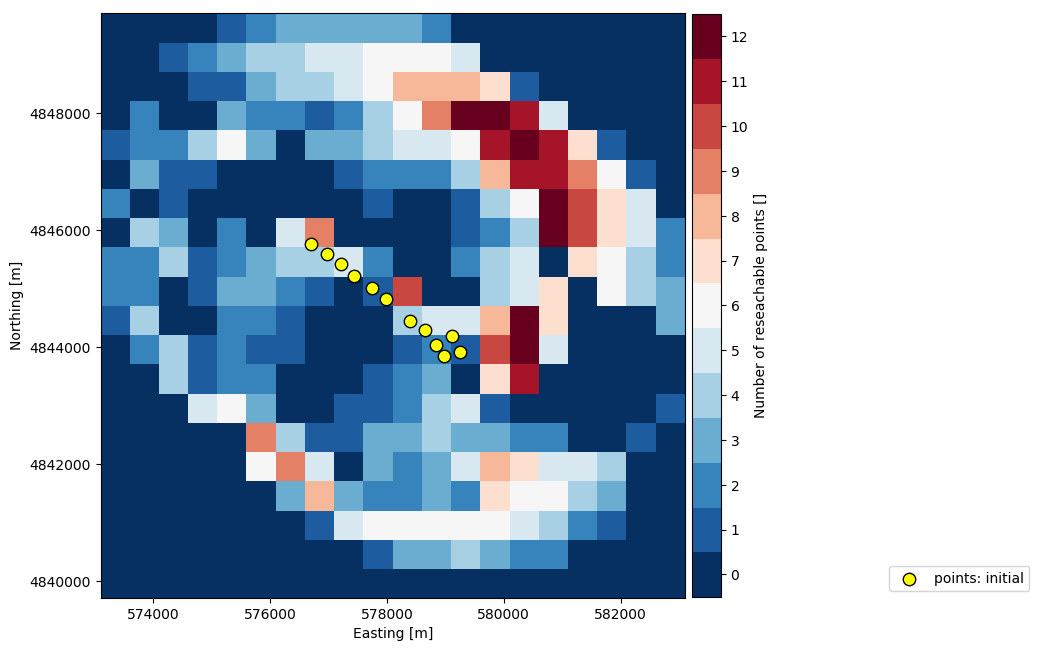

In [58]:
layout.plot_layer(layer_id = 'combined')

In [5]:
layout.add_lidar_instance(position = np.array([578886, 4847688+120, 179]),
                          lidar_id = 'koshava',
                          layer_id = 'combined')

Lidar 'koshava' added to the lidar dictionary, which now contains 1 lidar instance(s).
Updating lidar instance 'koshava' considering GIS layer 'combined'.


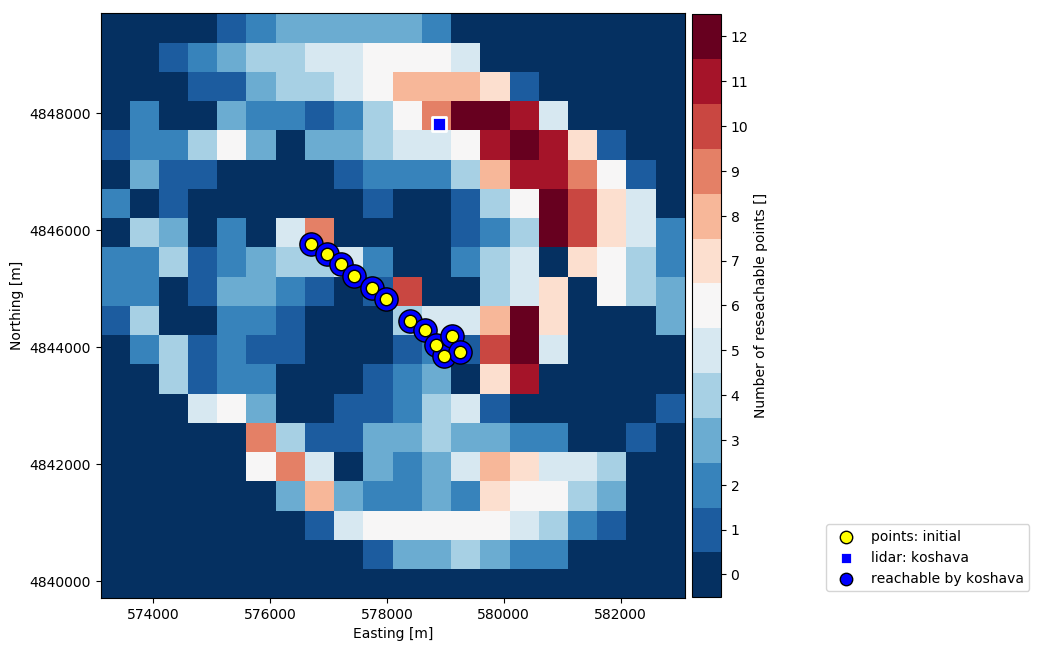

In [6]:
layout.plot_layer(layer_id = 'combined', lidar_ids = ['koshava'])

In [7]:
layout.generate_second_lidar_layer(lidar_id = 'koshava')

Updating lidar instance 'koshava' considering GIS layer 'combined'.


In [8]:
layout.add_lidar_instance(position = np.array([np.min(layout.x), np.max(layout.y), 0]),
                          lidar_id = 'north-west',
                          layer_id = 'combined')

layout.add_lidar_instance(position = np.array([np.max(layout.x), np.min(layout.y), 0]),
                          lidar_id = 'south-east',
                          layer_id = 'combined')

layout.add_lidar_instance(position = np.array([np.max(layout.x), np.max(layout.y), 0]),
                          lidar_id = 'north-east',
                          layer_id = 'combined')

layout.add_lidar_instance(position = np.array([np.min(layout.x), np.min(layout.y), 0]),
                          lidar_id = 'south-west',
                          layer_id = 'combined')

Lidar 'north-west' added to the lidar dictionary, which now contains 2 lidar instance(s).
Updating lidar instance 'north-west' considering GIS layer 'combined'.
Lidar 'south-east' added to the lidar dictionary, which now contains 3 lidar instance(s).
Updating lidar instance 'south-east' considering GIS layer 'combined'.
Lidar 'north-east' added to the lidar dictionary, which now contains 4 lidar instance(s).
Updating lidar instance 'north-east' considering GIS layer 'combined'.
Lidar 'south-west' added to the lidar dictionary, which now contains 5 lidar instance(s).
Updating lidar instance 'south-west' considering GIS layer 'combined'.


In [9]:
layout.add_lidar_instance(position = np.array([np.max(layout.x), np.min(layout.y), 0]),
                          lidar_id = 'south-east',
                          layer_id = 'combined')

Lidar 'south-east' added to the lidar dictionary, which now contains 5 lidar instance(s).
Updating lidar instance 'south-east' considering GIS layer 'combined'.


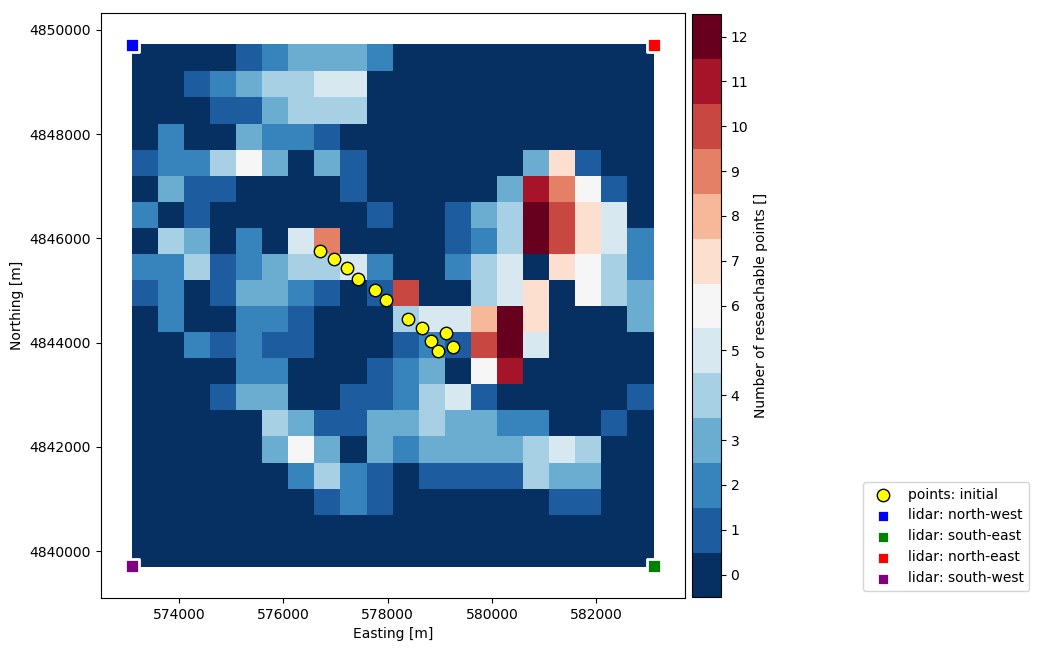

In [10]:
layout.plot_layer(layer_id = 'second_lidar_placement', lidar_ids = ['north-west', 
                                                                    'south-east', 
                                                                    'north-east', 
                                                                    'south-west'])

In [11]:
layout.add_lidar_instance(position = np.array([580460 + 100, 4846018, 220]),
                          lidar_id = 'bura', 
                           layer_id = 'second_lidar_placement')  

Lidar 'bura' added to the lidar dictionary, which now contains 6 lidar instance(s).
Updating lidar instance 'bura' considering GIS layer 'second_lidar_placement'.


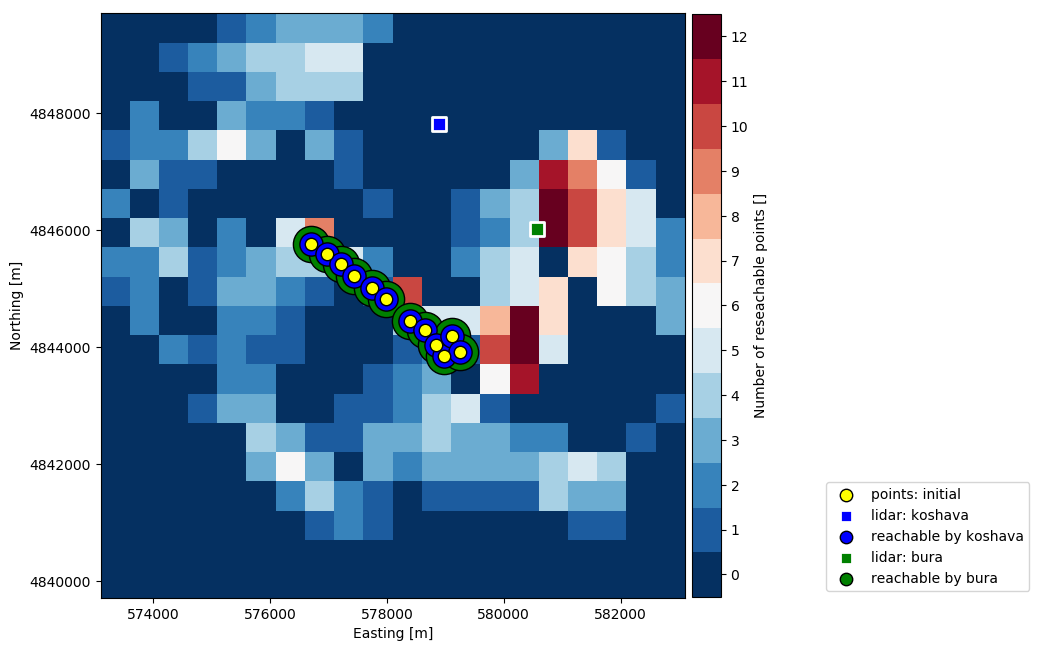

In [12]:
layout.plot_layer(layer_id = 'second_lidar_placement', lidar_ids = ['koshava', 'bura'], save_plot = True)

In [13]:
layout.optimize_trajectory(lidar_ids = ['north-west', 
                                                                    'south-east', 
                                                                    'north-east', 
                                                                    'south-west'], sync = True)

Lidar instances:['north-west', 'south-east', 'north-east', 'south-west'] will be updated with the optimized trajectory
Synchronizing trajectories for lidar instances:['north-west', 'south-east', 'north-east', 'south-west']


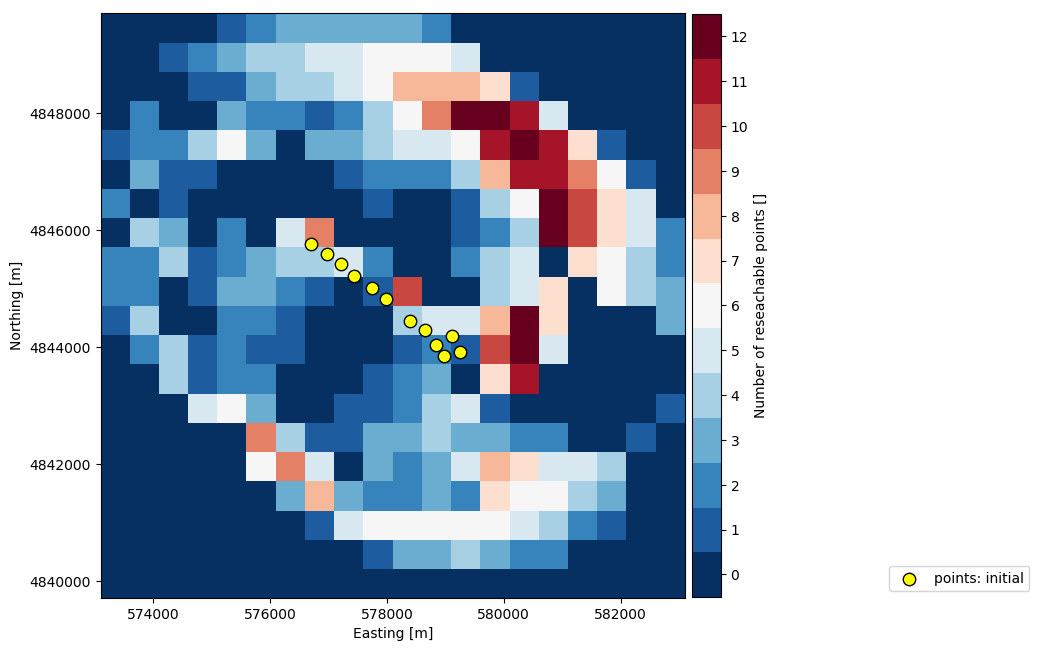

In [14]:
layout.plot_design(layer_id = 'combined', lidar_ids = ['hahaha', 'koshava'], savel_plot = True)

In [62]:
layout.ZOOM = 5
layout.export_measurement_scenario(lidar_ids = ['koshava', 'bura'])
layout.export_kml(lidar_ids = ['north-west', 
                                                                    'south-east', 
                                                                    'north-east', 
                                                                    'south-west'], layer_ids = ['combined'])

One or more lidar ids don't exist in the lidar dictionary
Available lidar ids: []
Aborting the current action!
One or more lidar ids don't exist in the lidar dictionary
Available lidar ids: []
Aborting the current action!


In [16]:
layout.mesh_corners_geo

array([[ 43.79578422,  16.03304233, 512.        ],
       [ 43.70575982,  16.03149491, 512.        ],
       [ 43.79684013,  15.90875614, 512.        ],
       [ 43.70681243,  15.90739482, 512.        ]])

In [17]:
layout.mesh_corners_utm

array([[ 573107, 4839710,   -4488],
       [ 583107, 4849710,    5512]])

In [18]:
help(layout.utm2geo)

Help on function utm2geo in module recast._generate_layers:

utm2geo(points_utm, long_zone, hemisphere)
    Converts an array of points in the UTM coord system to
    an array of point in the GEO coord system.
    
    Parameters
    ----------
    points_utm : ndarray
        nD array containing data with `float` or `int` type corresponding 
        to Northing, Easting and Height coordinates of points.
        nD array data are expressed in meters.
    long_zone : str
        A string representing longitudinal zone of the UTM grid zone.
    hemisphere : str
        A string indicating north or south hemisphere.            
    
    Returns
    -------
    points_geo : ndarray
        nD array containing data with `float` or `int` type corresponding 
        to latitude, longitude and height coordinates of points.



In [19]:
layout.mesh_corners_utm

array([[ 573107, 4839710,   -4488],
       [ 583107, 4849710,    5512]])

In [20]:
layout.mesh_center - [layout.MESH_RES,layout.MESH_RES,0]

array([ 577607, 4844210,     512])

In [21]:
corners = np.asarray([
layout.mesh_center + [ layout.MESH_EXTENT,  layout.MESH_EXTENT,0],
layout.mesh_center + [ layout.MESH_EXTENT,- layout.MESH_EXTENT,0],
layout.mesh_center + [-layout.MESH_EXTENT, layout.MESH_EXTENT,0],
layout.mesh_center + [-layout.MESH_EXTENT,-layout.MESH_EXTENT,0]])

In [22]:
np.max(layout.utm2geo(corners, '33T', 'north'), axis = 0)


array([ 43.79684013,  16.03304233, 512.        ])

In [23]:
np.min(layout.utm2geo(corners, '33T', 'north'), axis = 0)

array([ 43.70575982,  15.90739482, 512.        ])

In [24]:
layout.mesh_corners_utm

array([[ 573107, 4839710,   -4488],
       [ 583107, 4849710,    5512]])

In [25]:
layout.mesh_corners_utm[0][0]

573107

In [29]:
layout.epsg_code

'32633'

In [27]:
from osgeo import gdal
from osgeo import osr
from osgeo.gdalconst import *

In [28]:
proj = osr.SpatialReference()

In [46]:
layout.elevation_angle_array.shape

(21, 21, 12)

In [61]:
export_layer(layout, layer_id = 'combined')

21
21


ValueError: array larger than output file, or offset off edge

In [34]:
import numpy as np
from osgeo import gdal, osr, ogr, gdal_array
import yaml # installation via conda
from xml.dom.minidom import parseString
import dicttoxml
import simplekml
import matplotlib.pyplot as plt
from PIL import Image

from pathlib import Path
import os, shutil


In [60]:
    def export_layer(self, **kwargs):
        """
        Exports GIS layers as GeoTIFF.

        Attributes
        ---------
        see keyword arguments

        Keyword Arguments
        -----------------
        lidar_ids : list of strings
            A list containing lidar ids as strings corresponding
            to keys in the lidar dictionary
        layer_id : list of string
            A list of strings corresponding to the GIS layers
        """
        if ('layer_id' in kwargs):
            if kwargs['layer_id'] in self.LAYER_TYPE:
                if self.layer_selector(kwargs['layer_id']) is not None:
                    layer = self.layer_selector(kwargs['layer_id'])
                    
                    if len(layer.shape) > 2:
                        layer = np.sum(layer, axis = 2)
            
                    array_rescaled = (255.0 / layer.max() * (layer - layer.min())).astype(np.uint8)
                    array_rescaled = np.flip(array_rescaled, axis = 0)
                    image = Image.fromarray(np.uint8(plt.cm.RdBu_r(array_rescaled)*255))
            
                    multi_band_array = np.array(image)
                    
                    rows = multi_band_array.shape[0]
                    cols = multi_band_array.shape[1]
                    print(rows)
                    print(cols)
                    bands = multi_band_array.shape[2]
                    file_name_str = kwargs['layer_id'] + '.tif'
                    file_path = self.OUTPUT_DATA_PATH.joinpath(file_name_str)
                    dst_filename = file_path.absolute().as_posix()
                    
                    x_pixels = rows  # number of pixels in x
                    y_pixels = cols  # number of pixels in y
                    driver = gdal.GetDriverByName('GTiff')
                    options = ['PHOTOMETRIC=RGB', 'PROFILE=GeoTIFF']
                    dataset = driver.Create(dst_filename,x_pixels, y_pixels, bands,gdal.GDT_Byte,options = options)
                    
                    origin_x = self.mesh_corners_utm[0][0]
                    origin_y = self.mesh_corners_utm[1][1]
                    pixel_width = self.MESH_RES
                    geotrans = (origin_x, pixel_width, 0, origin_y, 0, -pixel_width)
            
                    proj = osr.SpatialReference()
#                   proj.SetWellKnownGeogCS( "EPSG:32633" )
                    proj.SetWellKnownGeogCS("WGS84")
                    proj.SetUTM(33, True)
#                    proj.ImportFromEPSG(int(self.epsg_code))
                    proj = proj.ExportToWkt()
            
                    for band in range(bands):
                        dataset.GetRasterBand(band + 1).WriteArray(multi_band_array[:,:,band])
            
            
                    dataset.SetGeoTransform(geotrans)
                    dataset.SetProjection(proj)
                    dataset.FlushCache()
                    dataset=None
                    


                else:
                    print('Requested layer is empty!')
                    print('Aborting the the operation!')
            else:
                print('Requested layer does not exist!')
                print('Aborting the the operation!')
        else:
            print('layer_id not provided as a keyword argument!')
            print('Aborting the the operation!')